# Programming Assignment 4 - MDP and Reinforcement Learning

In [133]:
import numpy as np
import pandas as pd
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning 
import hiive.mdptoolbox.example
from hiive.mdptoolbox import mdp, example
import mdptoolbox, mdptoolbox.example
from hiive.mdptoolbox import mdp, example
import gym
from openai import OpenAI_MDPToolbox
import matplotlib.pyplot as plt
import random
import time

import os
from gym import wrappers
import sys
from gym.envs.toy_text.frozen_lake import generate_random_map


import seaborn as sn
import sklearn

%matplotlib inline

In [107]:
# Common constants
random_seed = 1
random.seed(random_seed)
np.random.seed(random_seed)

SAVE_IMAGES = True

DATASET_1 = 'DATASET_1'
DATASET_2 = 'DATASET_2'

FROZEN_LAKE = 'FROZEN_LAKE'
FOREST_MANAGEMENT = 'FOREST_MANAGEMENT'

In [146]:
## Utility functions

'''
data: dictionary
    x_values, train_scores, test_scores, train_legend, test_legend, title, xlabel, ylabel, figname
'''
def create_plot(data):
    x_values = data.get('x_values')
    train_scores = data.get('train_scores')
    test_scores = data.get('test_scores')
    test_legend = data.get('test_legend')
    train_legend = data.get('train_legend')
    figname = data.get('figname')
    
    plt.figure()
    plt.plot(x_values, train_scores, label=train_legend)
    plt.plot(x_values, test_scores, label=test_legend)
    plt.title(data.get('title'))
    plt.xlabel(data.get('xlabel'))
    plt.ylabel(data.get('ylabel'))
    plt.legend(loc="best")
    plt.grid()
    if figname and SAVE_IMAGES:
        plt.savefig(figname)
    plt.show()

    
def create_plot(x_range=None, values_1=None, values_2=None, values_3=None, values_1_legend='', values_2_legend='', values_3_legend='', 
                title='', x_label='', y_label='', figname=''):
    plt.figure()
    print(x_range, values_1, values_2, values_3)
    plt.plot(x_range, values_1, label=values_1_legend)
    if values_2 is not None:
        plt.plot(x_range, values_2, label=values_2_legend)
    if values_3 is not None:
        plt.plot(x_range, values_3, label=values_3_legend)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    plt.grid()
    if figname and SAVE_IMAGES:
        plt.savefig(figname)
    plt.show()
    

def create_mean_plot(x_range=None, values_1=None, values_2=None, values_3=None, values_1_legend='', values_2_legend='', values_3_legend='', 
                title='', x_label='', y_label='', figname=''):
    plt.figure()
    plt.plot(x_range, np.mean(values_1, axis=1), label=values_1_legend)
    if values_2 is not None:
        plt.plot(x_range, np.mean(values_2, axis=1), label=values_2_legend)
    if values_3 is not None:
        plt.plot(x_range, np.mean(values_3, axis=1), label=values_3_legend)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    plt.grid()
    if figname and SAVE_IMAGES:
        plt.savefig(figname)
    plt.show()
    
def create_rewards_discountfactor_plot(x_range, dict, title='', x_label='', y_label='', figname=''):
    plt.figure()
    for key, value in dict.items():
        agent, rewards, iterations = value
        plt.plot(iterations, rewards, label=key)
        #plt.plot(np.mean(iterations, axis=0), np.mean(rewards, axis=0), label=key)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    plt.grid()
    if figname and SAVE_IMAGES:
        plt.savefig(figname)
    plt.show()
    

def create_rewards_discountfactor_plot_2(x_range, dict, title='', x_label='', y_label='', figname=''):
    plt.figure()
    for key, value in dict.items():
        agent, rewards, iterations = value
        print(rewards.shape)
        print(iterations.shape)
        #plt.plot(iterations, rewards, label=key)
        plt.plot(np.mean(iterations, axis=1), np.mean(rewards, axis=1), label=key)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    plt.grid()
    if figname and SAVE_IMAGES:
        plt.savefig(figname)
    plt.show()
    
def run(agent, max_iter, desc):
    rewards = np.zeros(max_iter+1)
    iterations = np.zeros(max_iter+1)
    start = time.time()
    agent.run()
    end = time.time()
    time_taken = end - start
    print(f'Time taken to run {desc}: {time_taken}')
    #print(agent.run_stats)
    for data in agent.run_stats:
        try:
            iter = data['Iteration']
            rewards[iter] = data['Mean V']
            iterations[iter] = iter
        except Exception as e:
            print(data)
    return agent, rewards, iterations, time_taken

def run_value_iteration(P, R, discount, max_iter):
    vi = ValueIteration(P, R, discount, max_iter=max_iter)
    return run(vi, max_iter, 'Value Iteration')

def run_policy_iteration(P, R, discount, max_iter):
    pi = PolicyIteration(P, R, discount, max_iter=max_iter)
    return run(pi, max_iter, 'Policy Iteration')

def run_q_learning(P, R, discount, max_iter, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1):
    q_learner = QLearning(P, R, discount, epsilon=epsilon, epsilon_decay=epsilon_decay, epsilon_min=epsilon_min, n_iter=max_iter)
    return run(q_learner, max_iter, 'Q Learning')

## FROZEN LAKE

Time taken to run Policy Iteration: 17.33805561065674
(321,)
(321,)
Time taken to run Value Iteration: 0.05421113967895508
Time taken to run Q Learning: 77.52150988578796
Time taken to run Policy Iteration: 19.982911348342896
Time taken to run Value Iteration: 0.09399843215942383
Time taken to run Q Learning: 74.13642621040344
Time taken to run Policy Iteration: 39.25482702255249
Time taken to run Value Iteration: 0.6579971313476562
{'State': None, 'Action': None, 'Reward': 0.9494561484568875, 'Error': 0.0001829239968609772, 'Time': 0.6029965877532959, 'Max V': 0.9494561484568875, 'Mean V': 0.17365024526408146, 'Iteration': 321}
{'State': None, 'Action': None, 'Reward': 0.9494561519295523, 'Error': 0.0001791956443991452, 'Time': 0.6050045490264893, 'Max V': 0.9494561519295523, 'Mean V': 0.1736904572116712, 'Iteration': 322}
{'State': None, 'Action': None, 'Reward': 0.9494561553137886, 'Error': 0.00017548996476521306, 'Time': 0.6069982051849365, 'Max V': 0.9494561553137886, 'Mean V': 0.

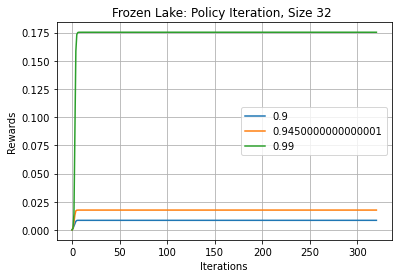

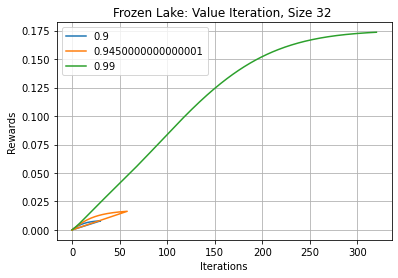

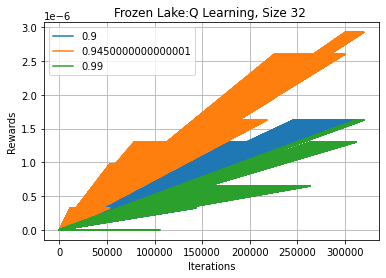

In [156]:
fl_pi_training_times = np.zeros((5, 1))
fl_vi_training_times = np.zeros((5, 1))
fl_q_training_times = np.zeros((5, 1))

def run_frozen_lake_example(p_fire=0.1):
    dims = [32]
    discount_factors = np.linspace(0.9, 0.99, 3)
    
    q_iterations = 10000
    pi_values = {}
    vi_values = {}
    q_values = {}
    pi_times = np.zeros([1, 5])
    
    for dim in dims:
        map = generate_random_map(size=dim, p=0.9)
        env = OpenAI_MDPToolbox("FrozenLake-v1", desc = map)
        P, R = env.P, env.R

        iterations = 10*dim
        index = 0
        for discount_factor in discount_factors:
            pi , pi_rewards, pi_iter, pi_time_taken = run_policy_iteration(P, R, discount_factor, iterations)
            pi_values[discount_factor] = (pi , pi_rewards, pi_iter)
            fl_pi_training_times[index] = fl_pi_training_times[index] + pi_time_taken
            if index == 0:
                print(pi_rewards.shape)
                print(pi_iter.shape)
            
            vi, vi_rewards, vi_iter, vi_time_taken = run_value_iteration(P, R, discount_factor, iterations)
            vi_values[discount_factor] = (vi , vi_rewards, vi_iter)
            fl_vi_training_times[index] = fl_vi_training_times[index] + vi_time_taken
            
            q_learner, q_rewards, q_iter, q_time_taken = run_q_learning(P, R, discount_factor, 10000*dim)
            q_values[discount_factor] = (q_learner, q_rewards, q_iter)
            fl_q_training_times[index] = fl_q_training_times[index] + q_time_taken
            
            index = index+1
            
        pi_title = 'Frozen Lake: Policy Iteration, Size {dim} '.format(dim=dim)
        pi_figname = 'frozen_pi_{dim}.png'.format(dim=dim)
        vi_title = 'Frozen Lake: Value Iteration, Size {dim} '.format(dim=dim)
        vi_figname = 'frozen_vi_{dim}.png'.format(dim=dim)
        q_title = 'Frozen Lake:Q Learning, Size {dim} '.format(dim=dim)
        q_figname = 'frozen_q_{dim}.png'.format(dim=dim)
        
        create_rewards_discountfactor_plot(range(0, iterations), pi_values, title=pi_title, x_label='Iterations', y_label='Rewards', figname=pi_figname)
        create_rewards_discountfactor_plot(range(0, iterations), vi_values, title=vi_title, x_label='Iterations', y_label='Rewards', figname=vi_figname)
        create_rewards_discountfactor_plot(range(0, q_iterations), q_values, title=q_title, x_label='Iterations', y_label='Rewards', figname=q_figname)

run_frozen_lake_example()

## Forest Management

Time taken to run Policy Iteration: 3.5696399211883545
(20001,)
(20001,)
Time taken to run Value Iteration: 0.18000316619873047
Time taken to run Q Learning: 211.19346022605896
Time taken to run Policy Iteration: 5.06482720375061
Time taken to run Value Iteration: 0.24376988410949707
Time taken to run Q Learning: 245.4124186038971
Time taken to run Policy Iteration: 7.343582391738892
Time taken to run Value Iteration: 0.3085489273071289
Time taken to run Q Learning: 219.33248901367188


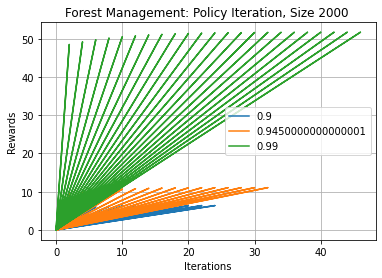

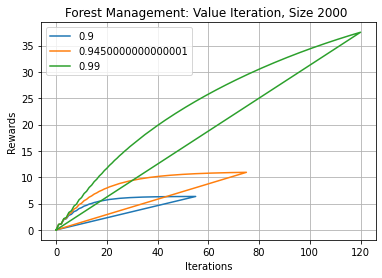

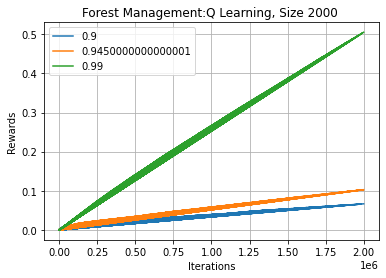

In [137]:
pi_training_times = np.zeros((5, 1))
vi_training_times = np.zeros((5, 1))
q_training_times = np.zeros((5, 1))

def run_forest_example(p_fire=0.1):
    dims = [2000]
    discount_factors = np.linspace(0.9, 0.99, 3)
    
    q_iterations = 10000
    pi_values = {}
    vi_values = {}
    q_values = {}
    pi_times = np.zeros([1, 5])
    
    for dim in dims:
        P, R = example.forest(S=dim, r1=100, r2=10, p=p_fire)
        iterations = 10*dim
        index = 0
        for discount_factor in discount_factors:
            pi , pi_rewards, pi_iter, pi_time_taken = run_policy_iteration(P, R, discount_factor, iterations)
            pi_values[discount_factor] = (pi , pi_rewards, pi_iter)
            pi_training_times[index] = pi_training_times[index] + pi_time_taken
            if index == 0:
                print(pi_rewards.shape)
                print(pi_iter.shape)
            
            vi, vi_rewards, vi_iter, vi_time_taken = run_value_iteration(P, R, discount_factor, iterations)
            vi_values[discount_factor] = (vi , vi_rewards, vi_iter)
            vi_training_times[index] = vi_training_times[index] + vi_time_taken
            
            q_learner, q_rewards, q_iter, q_time_taken = run_q_learning(P, R, discount_factor, 1000*dim)
            q_values[discount_factor] = (q_learner, q_rewards, q_iter)
            q_training_times[index] = q_training_times[index] + q_time_taken
            
            index = index+1
            
        pi_title = 'Forest Management: Policy Iteration, Size {dim} '.format(dim=dim)
        pi_figname = 'forest_pi_{dim}.png'.format(dim=dim)
        vi_title = 'Forest Management: Value Iteration, Size {dim} '.format(dim=dim)
        vi_figname = 'forest_vi_{dim}.png'.format(dim=dim)
        q_title = 'Forest Management:Q Learning, Size {dim} '.format(dim=dim)
        q_figname = 'forest_q_{dim}.png'.format(dim=dim)
        
        create_rewards_discountfactor_plot(range(0, iterations), pi_values, title=pi_title, x_label='Iterations', y_label='Rewards', figname=pi_figname)
        create_rewards_discountfactor_plot(range(0, iterations), vi_values, title=vi_title, x_label='Iterations', y_label='Rewards', figname=vi_figname)
        create_rewards_discountfactor_plot(range(0, q_iterations), q_values, title=q_title, x_label='Iterations', y_label='Rewards', figname=q_figname)
                    
run_forest_example()

In [106]:
q_training_times

array([[1.40765214],
       [1.39044213],
       [1.48813725],
       [0.        ],
       [0.        ]])

In [110]:
pi_training_times

array([[0.03318429],
       [0.0676415 ],
       [0.04892159],
       [0.        ],
       [0.        ]])

In [111]:
vi_training_times

array([[0.00199914],
       [0.00299907],
       [0.00401473],
       [0.        ],
       [0.        ]])

### epsilon parameter tuning

Time taken to run Q Learning: 2.9855051040649414
Time taken to run Q Learning: 3.4119787216186523
Time taken to run Q Learning: 3.202950954437256
Time taken to run Q Learning: 3.4239728450775146
Time taken to run Q Learning: 3.084897518157959
Time taken to run Q Learning: 3.2319679260253906
Time taken to run Q Learning: 3.3821725845336914
Time taken to run Q Learning: 3.0798850059509277
Time taken to run Q Learning: 3.2295644283294678
Time taken to run Q Learning: 3.127957582473755


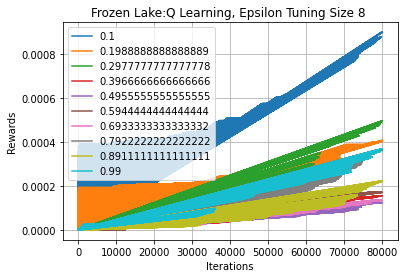

In [148]:


def run_frozen_lake_epsilon_tuning(p_fire=0.1):
    dims = [8]
    epsilon_values = np.linspace(0.1, 0.99, 10)
    
    q_iterations = 10000
    q_values = {}
    
    for dim in dims:
        map = generate_random_map(size=dim, p=0.9)
        env = OpenAI_MDPToolbox("FrozenLake-v1", desc = map)
        P, R = env.P, env.R

        index = 0
        for epsilon in epsilon_values:
            # (P, R, discount, max_iter, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1):
            q_learner, q_rewards, q_iter, q_time_taken = run_q_learning(P, R, .99, 10000*dim, epsilon=epsilon)
            q_values[epsilon] = (q_learner, q_rewards, q_iter)
            index = index+1
            
        q_title = 'Frozen Lake:Q Learning, Epsilon Tuning Size {dim} '.format(dim=dim)
        q_figname = 'frozen_q_epsilon_{dim}.png'.format(dim=dim)
        create_rewards_discountfactor_plot(range(0, q_iterations), q_values, title=q_title, x_label='Iterations', y_label='Rewards', figname=q_figname)

run_frozen_lake_epsilon_tuning()

Time taken to run Q Learning: 22.831510543823242
Time taken to run Q Learning: 23.292009115219116
Time taken to run Q Learning: 22.364945888519287
Time taken to run Q Learning: 21.953638315200806
Time taken to run Q Learning: 22.194364309310913
Time taken to run Q Learning: 22.329439401626587
Time taken to run Q Learning: 22.175978183746338
Time taken to run Q Learning: 22.38730502128601
Time taken to run Q Learning: 22.635578393936157
Time taken to run Q Learning: 22.70622682571411


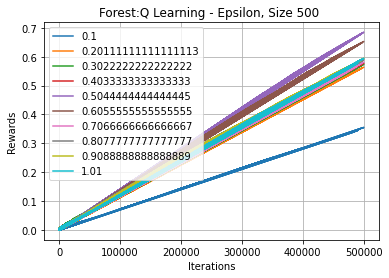

In [153]:
def run_forest_epsilon():
    dims = [500]
    epsilon_values = np.linspace(0.1, 1.01, 10)
    
    q_iterations = 10000
    q_values = {}
    
    for dim in dims:
        P, R = example.forest(S=dim, r1=100, r2=10, p=0.1)
        iterations = 10*dim
        for epsilon in epsilon_values:
            q_learner, q_rewards, q_iter, q_time_taken = run_q_learning(P, R, 0.99, 1000*dim, epsilon=epsilon)
            q_values[epsilon] = (q_learner, q_rewards, q_iter)
            
        q_title = 'Forest:Q Learning - Epsilon, Size {dim} '.format(dim=dim)
        q_figname = 'forest_q_epsilon{dim}.png'.format(dim=dim)
        
        create_rewards_discountfactor_plot(range(0, q_iterations), q_values, title=q_title, x_label='Iterations', y_label='Rewards', figname=q_figname)
                    
run_forest_epsilon()

Time taken to run Q Learning: 23.105746746063232
Time taken to run Q Learning: 22.689758777618408
Time taken to run Q Learning: 23.32040524482727
Time taken to run Q Learning: 22.80559492111206
Time taken to run Q Learning: 24.211560487747192
Time taken to run Q Learning: 22.786234378814697
Time taken to run Q Learning: 23.162402868270874
Time taken to run Q Learning: 22.627272844314575
Time taken to run Q Learning: 26.309112310409546
Time taken to run Q Learning: 24.32890820503235


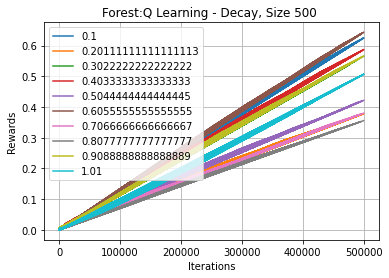

In [155]:
def run_forest_decay():
    dims = [500]
    epsilon_decay_list = np.linspace(0.1, 1.01, 10)
    
    q_iterations = 10000
    q_values = {}
    
    for dim in dims:
        P, R = example.forest(S=dim, r1=100, r2=10, p=0.1)
        iterations = 10*dim
        for epsilon_decay in epsilon_decay_list:
            q_learner, q_rewards, q_iter, q_time_taken = run_q_learning(P, R, 0.99, 1000*dim, epsilon_decay=epsilon_decay)
            q_values[epsilon_decay] = (q_learner, q_rewards, q_iter)
            
        q_title = 'Forest:Q Learning - Decay, Size {dim} '.format(dim=dim)
        q_figname = 'forest_q_decay{dim}.png'.format(dim=dim)
        
        create_rewards_discountfactor_plot(range(0, q_iterations), q_values, title=q_title, x_label='Iterations', y_label='Rewards', figname=q_figname)
                    
run_forest_decay()

Time taken to run Q Learning: 1.5428180694580078
Time taken to run Q Learning: 1.6724989414215088
Time taken to run Q Learning: 1.5120046138763428
Time taken to run Q Learning: 1.5138640403747559
Time taken to run Q Learning: 1.5422899723052979
Time taken to run Q Learning: 1.5191566944122314
Time taken to run Q Learning: 1.4988226890563965
Time taken to run Q Learning: 1.6050221920013428
Time taken to run Q Learning: 1.5540778636932373
Time taken to run Q Learning: 1.579765796661377


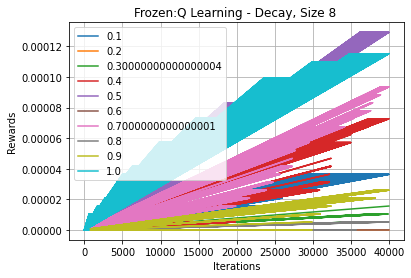

In [162]:
def run_frozen_decay():
    dims = [8]
    epsilon_decay_list = np.linspace(0.1, 1, 10)
    
    q_iterations = 10000
    q_values = {}
    
    for dim in dims:
        map = generate_random_map(size=dim, p=0.9)
        env = OpenAI_MDPToolbox("FrozenLake-v1", desc = map)
        P, R = env.P, env.R
        iterations = 10*dim
        for epsilon_decay in epsilon_decay_list:
            q_learner, q_rewards, q_iter, q_time_taken = run_q_learning(P, R, 0.99, 40000, epsilon_decay=epsilon_decay)
            q_values[epsilon_decay] = (q_learner, q_rewards, q_iter)
            
        q_title = 'Frozen:Q Learning - Decay, Size {dim} '.format(dim=dim)
        q_figname = 'frozen_q_decay{dim}.png'.format(dim=dim)
        
        create_rewards_discountfactor_plot(range(0, q_iterations), q_values, title=q_title, x_label='Iterations', y_label='Rewards', figname=q_figname)

        
run_frozen_decay()

C:\Users\yogpaul\AppData\Local\Temp\ipykernel_30196\310382508.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(size_range)
C:\Users\yogpaul\AppData\Local\Temp\ipykernel_30196\310382508.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(size_range)


<Figure size 432x288 with 0 Axes>

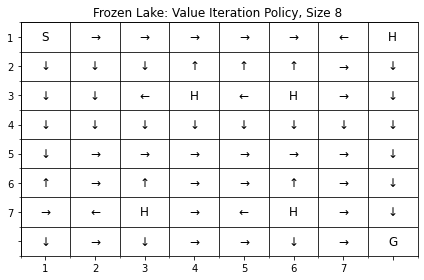

<Figure size 432x288 with 0 Axes>

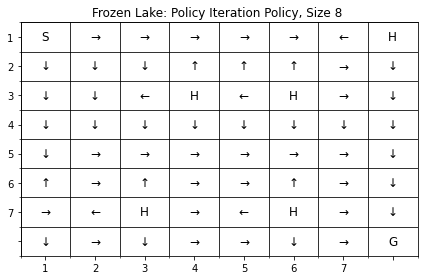

<Figure size 432x288 with 0 Axes>

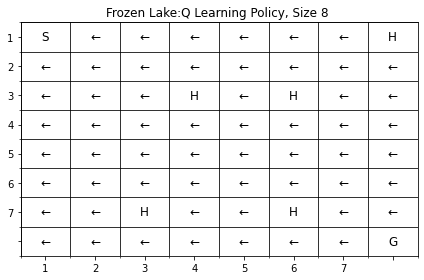

In [212]:
policy_env = {}
frozen_map = {}

def frozen_create_policies():
    dim=8
    pi_title = 'Frozen Lake: Policy Iteration Policy, Size {dim} '.format(dim=dim)
    pi_figname = 'frozen_pi_policy{dim}.png'.format(dim=dim)
    vi_title = 'Frozen Lake: Value Iteration Policy, Size {dim} '.format(dim=dim)
    vi_figname = 'frozen_vi_policy{dim}.png'.format(dim=dim)
    q_title = 'Frozen Lake:Q Learning Policy, Size {dim} '.format(dim=dim)
    q_figname = 'frozen_q_policy{dim}.png'.format(dim=dim)
    
    map = generate_random_map(size=dim, p=0.9)
    global frozen_map
    frozen_map = map
    env = OpenAI_MDPToolbox("FrozenLake-v1", desc = map)
    P, R = env.P, env.R
    global policy_env
    policy_env = env
    
    vi = ValueIteration(P, R, .99, max_iter=20000)
    vi.run()
    plot_frozen_lake_policy(dim, vi.policy, vi_title, vi_figname)
    
    pi = PolicyIteration(P, R, .99, max_iter=20000)
    pi.run()
    plot_frozen_lake_policy(dim, vi.policy, pi_title, pi_figname)
    
    q_learner = QLearning(P, R, .99, n_iter=20000)
    q_learner.run()
    plot_frozen_lake_policy(dim, q_learner.policy, q_title, q_figname)

def plot_frozen_lake_policy(size, policy, title, figname):
    global frozen_map
    size_range = np.arange(size)
    minor_range = np.arange(-0.5, size, 1)
    policy = np.asarray(policy).reshape((size, size))
    policy_symbols = {
        0: '\u2190',
        1: '\u2193',
        2: '\u2192',
        3: '\u2191'
    }

    plt.figure()
    fig, ax = plt.subplots()
    ax.set_xticklabels(size_range)
    ax.set_yticklabels(size_range)
    ax.grid(False)

    ax.set_xticks(minor_range, minor=True)
    ax.set_yticks(minor_range, minor=True)
    ax.grid(which='minor', color='black')

    for i in range(size):
        for j in range(size):
            text = policy_symbols[policy[i, j]]
            if frozen_map:
                if frozen_map[i][j] == 'S':
                    ax.text(j, i, 'S', ha='center', va='center', color='black', size=12)
                elif frozen_map[i][j] == 'G':
                    ax.text(j, i, 'G', ha='center', va='center', color='black', size=12)
                elif frozen_map[i][j] == 'F':
                    ax.text(j, i, text, ha='center', va='center', color='black', size=12)
                elif frozen_map[i][j] == 'H':
                    ax.text(j, i, 'H', ha='center', va='center', color='black', size=12)

    plt.gca().invert_yaxis()

    plt.title(title)
    fig.tight_layout()
    plt.savefig(figname)
    plt.show()
    plt.close()
    
frozen_create_policies()


In [210]:
frozen_map[1][0]

'H'